In [2]:
import pandas as pd
import numpy as np
import os

# Scientific question
how does transcription profile change with dengue disease?

goal: identify biomarkers

In [3]:
data_df         = pd.read_csv(os.path.join("data", "dengue", "dengue_transcriptome", "denv.csv"), header=None).T
data_df.columns = data_df.iloc[0]
data_df         = data_df.iloc[1:]
#data_df = data_df.drop(columns=["Sample_organism_ch1", "Sample_type",
#                        "Sample_last_update_date", "Sample_contact_address",
#                        "Sample_contact_city", "Sample_contact_state",
#                        "Sample_contact_country", "Sample_supplementary_file", "series_matrix_table_end",
#                        'Sample_data_processing', 'Sample_platform_id', 'Sample_contact_name',
#                        'Sample_contact_email', 'Sample_contact_department'])
data_df["diagnosis"] = data_df["diagnosis"].apply(lambda x: x.split(": ")[1])
data_df["patient_ID"] = data_df["Sample_title"].apply(lambda x: "-".join(x.split("-")[:-1]))

data_disease_df = data_df[["patient_ID", "diagnosis"]]
#data_disease_df = data_disease_df[data_disease_df.diagnosis != "exclude"]
data_disease_df["patient_diag"] = data_disease_df["patient_ID"] + "_" + data_disease_df["diagnosis"]
patient2diag_dict = dict(zip(data_disease_df["patient_ID"], data_disease_df["diagnosis"]))


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/1213487511.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_disease_df["patient_diag"] = data_disease_df["patient_ID"] + "_" + data_disease_df["diagnosis"]


In [4]:
def modify_patient_id_gene_expression(patient_id):
    l = patient_id.split("-")
    if len(l) == 3:
        return "-".join(l[:-1])
    else:
        return "-".join(l)

gene_expression_df = pd.read_excel(os.path.join("data", "dengue",  "dengue_transcriptome", "denv_pcr.xlsx"))
gene_expression_df = gene_expression_df[gene_expression_df["patient_ID"]!="3-004-01"]
gene_expression_df["patient_ID"] = gene_expression_df["patient_ID"].apply(modify_patient_id_gene_expression)
gene_expression_df["diagnosis"]  = gene_expression_df["patient_ID"].apply(lambda x: patient2diag_dict[x])
gene_expression_df               = gene_expression_df[gene_expression_df["diagnosis"] != "exclude"]
gene_expression_df

,patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold,diagnosis
0,1-010,S16-A04,PTPRM,20.817483,0.925333,Pass,0.004331,DSS
1,1-010,S16-A01,AAK1,17.748183,0.795321,Pass,0.001502,DSS
2,1-010,S16-A02,BMP2K,17.294386,0.798279,Pass,0.003788,DSS
3,1-010,S16-A03,ENPP5,29.129949,0.662016,Pass,0.001880,DSS
4,1-010,S16-A08,C3orf18,22.489814,0.767580,Pass,0.003659,DSS
...,...,...,...,...,...,...,...,...
10219,1-024,S33-A34,TMEM63C,26.533032,0.567610,Pass,0.001819,DF
10220,1-024,S33-A35,EMPTY,40.000000,0.000000,No Call,0.001819,DF
10221,1-024,S33-A02,BMP2K,40.000000,0.000000,Pass,0.001819,DF
10222,1-024,S33-A04,PTPRM,22.472190,0.900244,Pass,0.001819,DF


Text(0.02, 0.5, 'count')

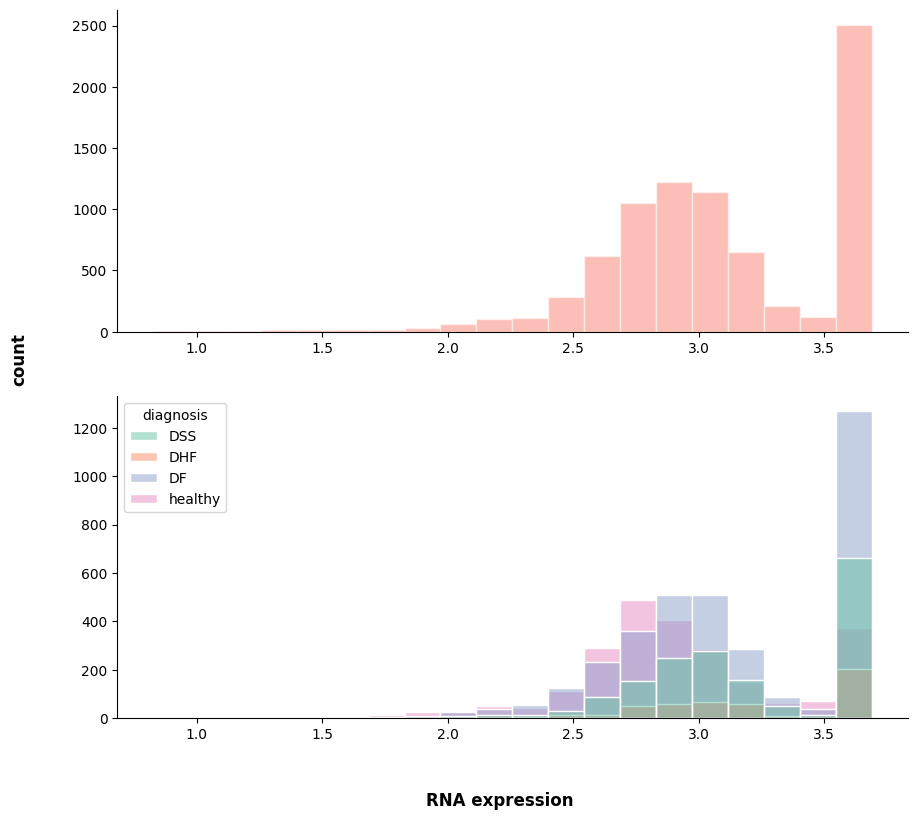

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(2, 1, figsize=(10.2, 9.2))

ax[0].hist(np.log(gene_expression_df["Value"].values), edgecolor="w", facecolor="salmon",
                                                                alpha=0.5, bins=20)

gene_expression_df["log_Value"] = np.log(gene_expression_df["Value"].values)
sns.histplot(ax       = ax[1],
            data      = gene_expression_df,
            x         = "log_Value",
            hue       = "diagnosis",
            edgecolor = "w",
            bins    = 20,
            palette = "Set2")
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

for axi in ax.flatten():
    axi.spines["top"].set_visible(False)
    axi.spines["right"].set_visible(False)

fig.supxlabel("RNA expression", weight="bold")
fig.supylabel("count", weight="bold")


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/866531282.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_expression2_df["log_Value"] = np.log(gene_expression2_df["Value"].values)


Text(0.02, 0.5, 'count')

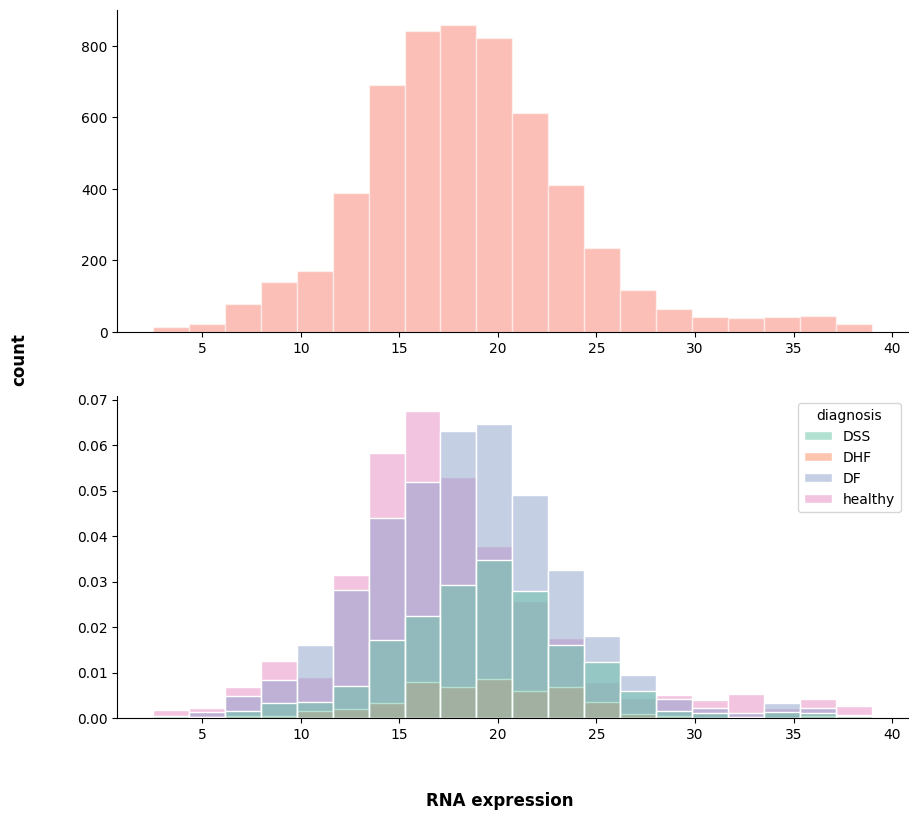

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


gene_expression2_df = gene_expression_df[gene_expression_df.Quality>0]

fig, ax = plt.subplots(2, 1, figsize=(10.2, 9.2))

ax[0].hist(gene_expression2_df["Value"].values, edgecolor="w", facecolor="salmon",
                                                                alpha=0.5, bins=20)

gene_expression2_df["log_Value"] = np.log(gene_expression2_df["Value"].values)
sns.histplot(ax       = ax[1],
            data      = gene_expression2_df,
            x         = "Value",
            hue       = "diagnosis",
            edgecolor = "w",
            bins      = 20,
            stat      = "probability",
            palette   = "Set2")

ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

for axi in ax.flatten():
    axi.spines["top"].set_visible(False)
    axi.spines["right"].set_visible(False)

fig.supxlabel("RNA expression", weight="bold")
fig.supylabel("count", weight="bold")


In [7]:
def dig2num(diagnosis):
    if diagnosis == "DF":
        return 1
    elif diagnosis == "DHF":
        return 2
    elif diagnosis == "DSS":
        return 3
    else:
        return 0

logistic_reg_df = gene_expression2_df[["patient_ID", "mRNA", "Value", "diagnosis"]]
logistic_reg_df["value_diag"] = logistic_reg_df["diagnosis"].apply(dig2num)

labels_df                  = logistic_reg_df[["patient_ID", "value_diag"]].drop_duplicates().reset_index(drop=True)
labels_df["disease_label"] = labels_df["value_diag"].apply(lambda x: 1 if x>0 else 0)

expression_mat_df  = pd.pivot_table(logistic_reg_df, index="patient_ID", columns="mRNA", values="Value")


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/3602218765.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logistic_reg_df["value_diag"] = logistic_reg_df["diagnosis"].apply(dig2num)


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/2985713943.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_anova_df = pd.concat([df, gene_anova_df], ignore_index=True)


(-0.5034374141547587, 0.5034374141547587)

/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in

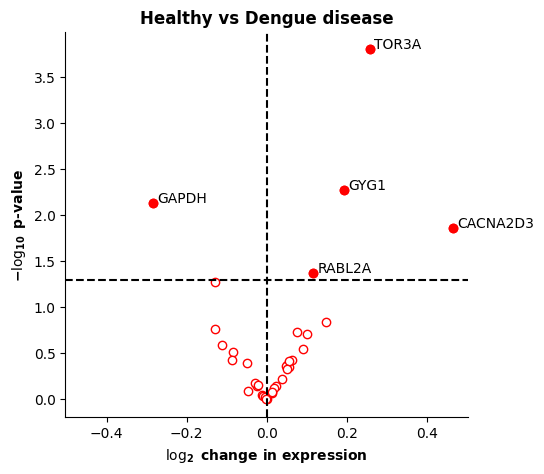

In [8]:
# Importing library
from scipy.stats import f_oneway

healthy_df    = expression_mat_df.iloc[list(labels_df.disease_label==0), :]
diease_df     = expression_mat_df.iloc[list(labels_df.disease_label==1), :]

gene1_healthy = healthy_df.iloc[:, 0].values
gene1_disease = diease_df.iloc[:, 0].values


gene_anova_df = pd.DataFrame(columns=["gene", "pval", "gene_health_mean", "gene_disease_mean"])
for igene, gene in enumerate(expression_mat_df.columns):

    gene1_healthy = healthy_df.iloc[:, igene].dropna().values
    gene1_disease = diease_df.iloc[:, igene].dropna().values


    anov              = f_oneway(gene1_healthy, gene1_disease)
    pval_gene         = anov.pvalue

    gene_health_mean  = gene1_healthy.mean()
    gene_disease_mean = gene1_disease.mean()


    df = pd.DataFrame([{"gene" :        gene,
                                        "pval":              pval_gene,
                                        "gene_health_mean":  gene_health_mean,
                                        "gene_disease_mean": gene_disease_mean}])
    gene_anova_df = pd.concat([df, gene_anova_df], ignore_index=True)

gene_anova_df["log2_expression"] = np.log2(gene_anova_df["gene_disease_mean"]/gene_anova_df["gene_health_mean"])


fig, ax = plt.subplots(1, 1, figsize=(5.2, 5))

ax.scatter(gene_anova_df["log2_expression"], -np.log10(gene_anova_df["pval"]), fc="w", ec="r")
ax.axhline(-np.log10(0.05), color="k", ls="--")
ax.axvline(x=0, color="k", ls="--")

for gene in  gene_anova_df[gene_anova_df["pval"]<0.05].gene.values:
    row = gene_anova_df[gene_anova_df["gene"]==gene]
    ax.scatter(row.log2_expression,   -np.log10(row.pval), fc="r", ec="r")
    ax.text(row.log2_expression+1e-2, -np.log10(row.pval)+1e-2, gene)

#ax.text(-0.4, -np.log10(0.05), r"$\uparrow$ significant")

ax.set_xlabel(r"$\mathbf{{\log_2}}$ change in expression", weight="bold")
ax.set_ylabel(r"$\mathbf{{-\log_{10}}}$ p-value", weight="bold")

ax.set_title("Healthy vs Dengue disease", weight="bold")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim(-np.max(np.abs(ax.get_xlim())), np.max(np.abs(ax.get_xlim())))

# PCA

In [9]:
# X = feature values, all the columns except the last column
x_mat = expression_mat_df.iloc[:, :]
μ_x   = np.nanmean(x_mat, axis=0)
σ_x   = np.nanstd(x_mat, axis=0)

xn_mat = (x_mat - μ_x) / σ_x
xn_mat = np.c_[np.ones((xn_mat.shape[0], 1)), xn_mat] ## augment with column of ones
y_vec  = labels_df.iloc[:, -1].to_numpy()


Text(0, 0.5, 'principal component 2, 1.69%')

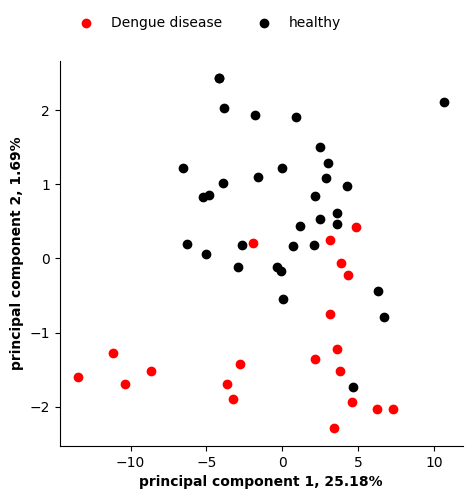

In [10]:
from sklearn.decomposition import PCA
pca_mRNA_denv = PCA(n_components=2, svd_solver='arpack')
pc_mRNA       = pca_mRNA_denv.fit_transform(np.nan_to_num(xn_mat[:, 1:]))


label2color = {0:"red", 1:"black"}
y_color     = [label2color[y] for y in y_vec]

pca_df          = pd.DataFrame(data = pc_mRNA, columns = ['pc1', 'pc2'])
pca_df["color"] = y_color

fig, ax = plt.subplots(1, 1, figsize=(5.2, 5))

labels = ["Dengue disease", "healthy"]
for ic, c in enumerate(["red", "black"]):

    pca_plot_df = pca_df[pca_df.color == c]
    ax.scatter(pca_plot_df.pc1, pca_plot_df.pc2, color=c, label=labels[ic])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc="upper left", bbox_to_anchor=(0, 1.15), ncol=2, frameon=False)

exp_var = pca_mRNA_denv.explained_variance_

ax.set_xlabel("principal component 1, {:0.2f}%".format(exp_var[0]), weight="bold")
ax.set_ylabel("principal component 2, {:0.2f}%".format(exp_var[1]), weight="bold")


In [11]:
pca_mRNA_denv = PCA(n_components=20, svd_solver='arpack')
pc_mRNA       = pca_mRNA_denv.fit_transform(np.nan_to_num(xn_mat[:,1:]))

dfLoadings = pd.DataFrame(pca_mRNA_denv.components_,
                          columns = expression_mat_df.columns,
                          index   = [f"pc{i}" for i in range(1, 20+1)])


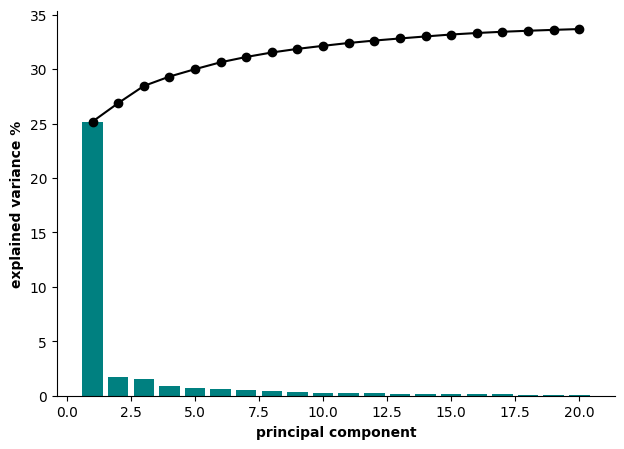

In [12]:
pca_mRNA_denv.explained_variance_

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))

ax.bar(range(1,     len(pca_mRNA_denv.explained_variance_ratio_)+1), pca_mRNA_denv.explained_variance_, color="teal")
ax.plot(range(1,    len(pca_mRNA_denv.explained_variance_ratio_)+1), np.cumsum(pca_mRNA_denv.explained_variance_), color="k", ls="-")
ax.scatter(range(1, len(pca_mRNA_denv.explained_variance_ratio_)+1), np.cumsum(pca_mRNA_denv.explained_variance_), color="k")

ax.set_ylabel("explained variance %", weight="bold")
ax.set_xlabel("principal component", weight="bold")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


# Logistic regression

In [13]:
from scipy.optimize import fmin_tnc

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prob(theta, x):
    return sigmoid(np.dot(x, theta))

def objective(theta, x, y):
    # Computes the (negative of the) objective function, for all the training samples
    p = prob(theta, x)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta values
    return np.dot(x.T, sigmoid(np.dot(x, theta)) - y)

def fit(x, y, theta):
    return fmin_tnc(func=objective, x0=theta, fprime=gradient, args=(x, y))[0]


In [14]:
θ_0        = np.zeros((xn_mat.shape[1], 1))
theta_star = fit(np.nan_to_num(xn_mat), y_vec, θ_0)
theta_star

  NIT   NF   F                       GTG
    0    1  3.673680056967711E+01   6.95937430E+02
tnc: fscale = 0.0379066
    1    7  8.439503387381260E+00   1.08092711E+01
    2   15  3.498287056360687E+00   9.30801950E+00
tnc: stepmx = 1000
    3   21  5.615293056120232E-01   2.08420904E-01
tnc: fscale = 2.19043
    4   32  1.714689425451980E-01   3.99625028E-02
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/218730214.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/218730214.py:12: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    5   42  2.319445799637179E-02   5.27931897E-04
    6   69  1.413446141073356E-02   1.60512893E-04
tnc: fscale = 78.9305
tnc: |fn-fn-1] = 1.43494e-09 -> convergence
    7  120  1.413445997579372E-02   1.60512853E-04
tnc: Converged (|f_n-f_(n-1)| ~= 0)


array([  6.61371408,   1.99752574,   0.39807994,  -3.17785457,
         1.38000162,   1.24017404,   0.63281725,  -7.01157665,
       -12.11256545,   1.7019342 ,   7.80156499,  -5.73416917,
        -6.490996  ,  -0.22341846,  -2.49318245,  -1.94520583,
         7.6715969 ,   3.26653271,   9.357374  ,  -4.29264517,
        -6.79387694,  -6.04279057,  -2.48299385,   8.18949964,
         3.13101699,   9.0974532 ,  -7.32845753,   3.41393299,
        -3.66625805,  12.91711962,  -2.8115723 ,   9.85414061,
         0.45866488,  -4.46277821,   1.31352971,   3.32531941])

In [15]:
def accuracy(x, actual_classes, θ):
    predicted_classes = (prob(θ, x) >= 0.5).astype(int).flatten()
    return 100 * np.mean(predicted_classes == actual_classes)

acc = accuracy(xn_mat, y_vec, theta_star)

print("\n Accuracy {}\n".format(acc))


 Accuracy 58.490566037735846



/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/1461325888.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(expression_mat_df.columns.values, rotation=90)


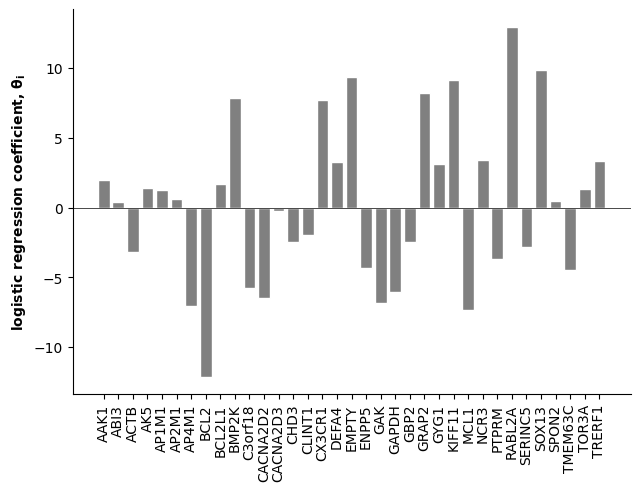

In [16]:

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))
ax.bar(expression_mat_df.columns.values, theta_star[1:], color="gray", edgecolor="w")

ax.axhline(0, color="k", ls="-", lw=0.5)

ax.set_ylabel(r"logistic regression coefficient, $\mathbf{{\theta_i}}$", weight="bold")
ax.set_xticklabels(expression_mat_df.columns.values, rotation=90)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

## logistic regression just on the 5 genes significant in the ANOVA (volcano plot)


In [17]:
genes_diff_exp = ["GAPDH", "TOR3A", "GYG1", "RABL2A", "CACNA2D3"]

x_mat = expression_mat_df[genes_diff_exp].iloc[:, :]
μ_x   = np.nanmean(x_mat, axis=0)
σ_x   = np.nanstd(x_mat, axis=0)

xn_mat = (x_mat - μ_x) / σ_x
xn_mat = np.c_[np.ones((xn_mat.shape[0], 1)), xn_mat] ## augment with column of ones
y_vec  = labels_df.iloc[:, -1].to_numpy()

# regression
θ_0        = np.zeros((xn_mat.shape[1], 1))
theta_star = fit(np.nan_to_num(xn_mat), y_vec, θ_0)
theta_star

acc   = accuracy(xn_mat, y_vec, theta_star)
print("\n Accuracy {}\n".format(acc))



 Accuracy 54.71698113207547



  NIT   NF   F                       GTG
    0    1  3.673680056967711E+01   4.39177197E+02
tnc: fscale = 0.0477178
    1    4  2.150251025796690E+01   2.33389941E+01
    2   10  1.934748088815609E+01   1.59883826E+00
    3   15  1.897576265306923E+01   2.30855254E-01
tnc: fscale = 2.08128
    4   19  1.894701709860531E+01   5.80121390E-03
    5   22  1.894590014290099E+01   4.95591626E-04
tnc: fscale = 44.9198
    6   25  1.894585097635814E+01   4.77840993E-05
    7   29  1.894584273012264E+01   3.80082343E-07
tnc: fscale = 1622.04
    8   33  1.894584257116178E+01   3.72835125E-08
tnc: |fn-fn-1] = 6.53365e-09 -> convergence
    9   36  1.894584256462813E+01   8.69436751E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)


## logistic regression on the first 20 principal components

In [18]:
θ_02  = np.zeros((pc_mRNA.shape[1], 1))
θ_hat = fit(pc_mRNA, y_vec, θ_02)


  NIT   NF   F                       GTG
    0    1  3.673680056967711E+01   6.52030834E+02
tnc: fscale = 0.0391621
    1    7  1.221296409653059E+01   1.69410206E+02
    2   19  9.439588507008112E+00   4.15946787E+01
    3   22  8.791344250330130E+00   1.10551874E+00
tnc: fscale = 0.95108
    4   30  7.561656241983715E+00   9.78263642E-01
tnc: stepmx = 1000
    5   37  5.986657063360131E+00   1.78602889E+00
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/218730214.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/218730214.py:12: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    6   74  4.478285432451163E+00   4.94381372E-01
tnc: |fn-fn-1] = 7.87042e-09 -> convergence
    7  128  4.478285424580744E+00   4.94381370E-01
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [19]:
acc   = accuracy(pc_mRNA, y_vec, θ_hat)
print("\n Accuracy {}\n".format(acc))



 Accuracy 96.22641509433963



/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/855452679.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"PC{i}" for i in range(1, 20)], rotation=90)


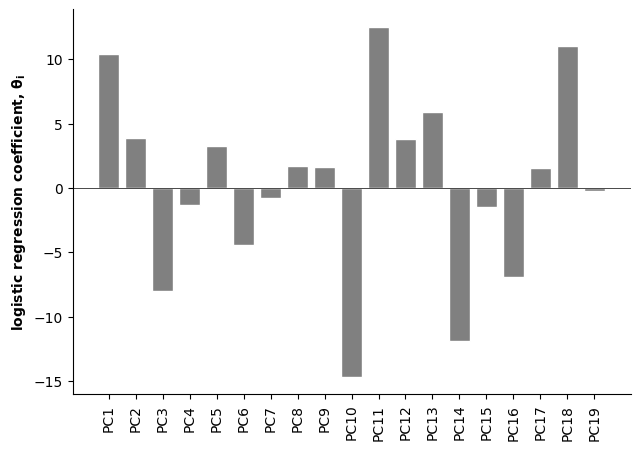

In [20]:

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))
ax.bar([f"PC{i}" for i in range(1, 20)], θ_hat[1:], color="gray", edgecolor="w")

ax.set_ylabel(r"logistic regression coefficient, $\mathbf{{\theta_i}}$", weight="bold")

ax.set_xticklabels([f"PC{i}" for i in range(1, 20)], rotation=90)
ax.axhline(0, color="k", ls="-", lw=0.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

## cross-validation (and bootstrapping)
textbooks typically introduce both cross-validation and bootstrapping in different sections. they technically are different but the goal of both is the same: estimate expected prediction error.
in CV one ideally have a huge dataset that can split in $K$ partitions and each training procedure involves training the model in the data that belongs to $K-1$ partitions and use the one left out for testing. That way you'll end with $K$ models trained and the expected prediction accuracy is just the average accuracy in the .

Bootstrapping correspond to a sampling procedure of a fixed dataset as described below. I like to think of this method as a Monte Carlo method were the distribution to sample is the empirical distribution given by the data  the dataset and thus random sampling correspond to draw from that distribution. as a consequence, the estimate of the prediction accuracy also have embedded information of the variance of that accuracy, a Monte Carlo estimate of the variance. cross-validation allows a estimate of the variance of the prediction accuracy.

Additionally, typically is hard to have huge sample sizes of observed a phenomena, like the Dengue disease case where clinical cases due to severe disease is a small ($\sim$ 10\% ) sample of the true infections. and thus the bootstrapping language is preferred.

*bootstrapping*

the idea here is to create K models trained on $N-T$ train samples where $N$ in the size of the data set and $T$ the size of the test set.

the $N-T$ train samples are drawn with resample from the dataset, so each training set represent a random population sample and so does the test set.

in reality of course is not random as $P(\text{blood sample}|\text{disease})$ is way bigger than $P(\text{blood sample}|\text{healthy})$ in real life, but we don't know those numbers so far so bootstraping (cross-validation) is the best we can do to estimate the test error/accuracy.

this estimate is in theory a statistical, unbiased $\left(\mathbb{E}[\hat{\text{error}}] = \text{error}\right)$, estimate of the test error in IID population, which is not the case but still is the best we can do.


In [21]:
def cross_val_indexes(n, n_train_frac=80, K=30):

    n_train = int(n * n_train_frac / 100)
    n_test  = n - n_train

    train_indexes = np.zeros((K, n_train))
    test_indexes  = np.zeros((K, n_test))

    indexes = np.arange(n)
    for ki in range(K):

        train_indexes[ki, :] = np.random.choice(indexes, n_train, replace=True)
        test_index           = list(set(indexes) - set(train_indexes[ki, :]))
        test_indexes[ki, :]  = np.random.choice(test_index, n_test, replace=True)

    return np.asarray(train_indexes, dtype=int),  np.asarray(test_indexes, dtype=int)



In [22]:
x_mat = expression_mat_df.iloc[:, :]
μ_x   = np.nanmean(x_mat, axis=0)
σ_x   = np.nanstd(x_mat, axis=0)

xn_mat = (x_mat - μ_x) / σ_x
xn_mat = np.c_[np.ones((xn_mat.shape[0], 1)), xn_mat] ## augment with column of ones
y_vec  = labels_df.iloc[:, -1].to_numpy()

K   = 300
train_indexes, test_indexes = cross_val_indexes(n=len(expression_mat_df), n_train_frac=80, K=K)

θ0 = np.zeros((xn_mat.shape[1], 1))

θ_cv       = np.full((K, xn_mat.shape[1]), np.nan)
accu_train = np.full(K, np.nan)
accu_test  = np.full(K, np.nan)

for ki in range(K):

    train_set = train_indexes[ki, :]
    test_set  = test_indexes[ki, :]

    xn_train  = np.nan_to_num(xn_mat[train_set, :])
    y_train   = y_vec[train_set]

    xn_test  = np.nan_to_num(xn_mat[test_set, :])
    y_test   = y_vec[test_set]

    θ           = fit(xn_train, y_train, θ0)
    θ_cv[ki, :] = θ

    acc_train = accuracy(xn_train, y_train, θ)
    acc_test  = accuracy(xn_test, y_test, θ)

    accu_train[ki] = acc_train
    accu_test[ki]  = acc_test


  NIT   NF   F                       GTG
    0    1  2.911218158351770E+01   5.27776008E+02
tnc: fscale = 0.0435286
    1    5  8.949277146483933E+00   3.44914419E+01
    2    9  2.138609774348340E+00   3.58065729E+00
    3   13  4.720533626791878E-01   1.40443122E-01
tnc: fscale = 2.66839
    4   18  2.731677300830097E-01   1.91553159E-01
    5   24  8.930448940086404E-02   7.08937311E-02
    6   31  2.105385572284758E-02   6.28874408E-04
    7   38  8.873708051093509E-03   3.19024488E-04
tnc: fscale = 55.9871
    8   46  1.858933133342875E-03   1.08980555E-05
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/218730214.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_75154/218730214.py:12: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    9   54  3.263206619808954E-04   2.84153368E-

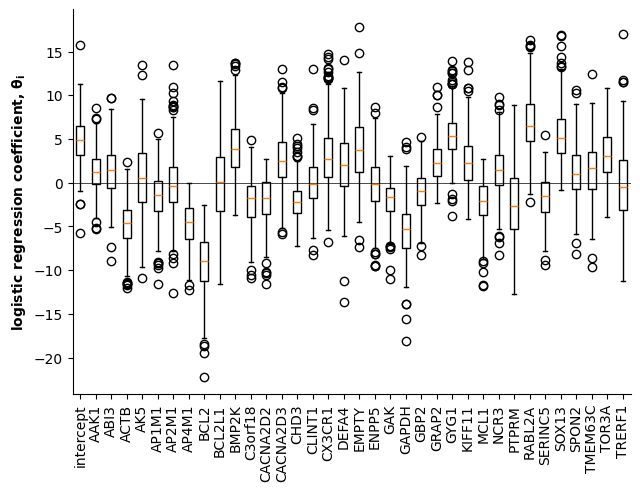

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))

bplot = ax.boxplot(θ_cv[:, :],
                patch_artist = True,  # fill with color
                labels       = ["intercept"]+list(expression_mat_df.columns.values))  # will be used to label x-ticks

ax.set_ylabel(r"logistic regression coefficient, $\mathbf{{\theta_i}}$", weight="bold")
ax.set_xticklabels(["intercept"]+list(expression_mat_df.columns.values), rotation=90)
ax.axhline(0, color="k", ls="-", lw=0.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# fill with colors
for patch in bplot['boxes']:
    patch.set_facecolor("w")
    patch.set_edgecolor("k")


Text(0.02, 0.5, 'accuracy %')

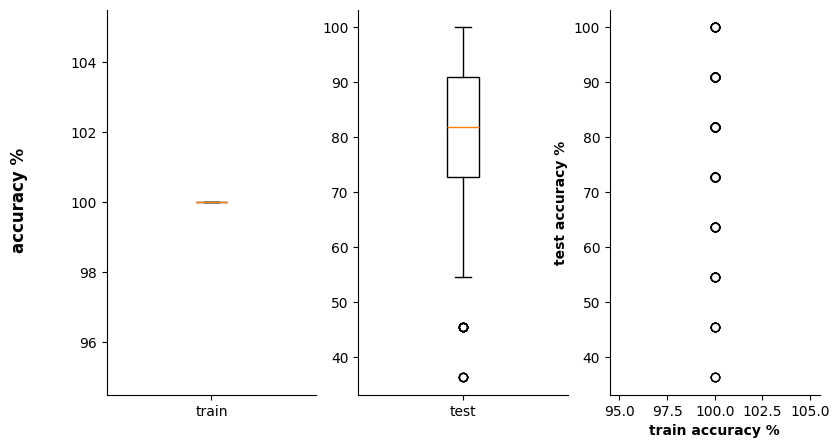

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(9.2, 5))

bplot1 = ax[0].boxplot(accu_train,
                    patch_artist = True,          # fill with color
                    labels       = ["train"])     # will be used to label x-ticks
bplot2 = ax[1].boxplot(accu_test,
                        patch_artist = True,      # fill with color
                        labels       = ["test"])  # will be used to label x-ticks

ax[2].scatter(accu_train, accu_test, fc="w", ec="k")

for axi in ax.flatten():
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

# fill with colors
for patch in bplot1['boxes']:
    patch.set_facecolor("w")
    patch.set_edgecolor("k")

for patch in bplot2['boxes']:
    patch.set_facecolor("w")
    patch.set_edgecolor("k")

ax[2].set_xlabel("train accuracy %", weight="bold")
ax[2].set_ylabel("test accuracy %", weight="bold")

fig.supylabel("accuracy %", weight="bold")

In [25]:
accu_test

array([ 45.45454545,  36.36363636,  90.90909091,  72.72727273,
        81.81818182,  54.54545455,  90.90909091,  63.63636364,
        90.90909091,  81.81818182,  90.90909091,  81.81818182,
        90.90909091,  81.81818182,  90.90909091,  90.90909091,
        81.81818182,  45.45454545,  81.81818182,  90.90909091,
        63.63636364,  90.90909091,  81.81818182,  63.63636364,
        72.72727273,  81.81818182,  36.36363636,  90.90909091,
        72.72727273,  90.90909091,  63.63636364, 100.        ,
        72.72727273,  81.81818182,  54.54545455,  63.63636364,
       100.        ,  90.90909091,  81.81818182,  90.90909091,
        63.63636364, 100.        ,  72.72727273,  81.81818182,
        81.81818182,  54.54545455,  81.81818182,  90.90909091,
        54.54545455,  81.81818182,  90.90909091,  90.90909091,
        72.72727273, 100.        ,  81.81818182,  63.63636364,
        72.72727273,  90.90909091,  72.72727273,  90.90909091,
       100.        ,  90.90909091,  63.63636364,  81.81

In [26]:
# 